In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import subprocess
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)
% matplotlib inline

In [3]:
def GetCompData(fName,dataLabel='comparison',lolim = -150,hilim = 150):
    ncData = nc.Dataset(fName)
    for key in ncData.variables:
        if key.startswith(dataLabel):
            comp = ncData.variables[key]
    compAr = np.array(comp)
    flatCompAr = compAr.flatten()
    flatCompAr = flatCompAr[np.isfinite(flatCompAr)]
    ncData.close()
    lolimIdx = flatCompAr >= lolim
    hilimIdx = flatCompAr <= hilim
    goodIdx = lolimIdx * hilimIdx
    return flatCompAr[goodIdx]

def PlotComparisons(objList,colorList,plotTitle='Band-shifting comparison'):
    bns=np.linspace(-100,100,100);
    figHandle = plt.figure(figsize=(14,6))
    plt.title(plotTitle,fontsize=18)
    pltHandles = []
    percLo = []
    percHi = []
    percMed = []
    for i,obj in enumerate(objList):
        h = plt.hist(obj.data,bins=bns,normed='yes',histtype='stepfilled',
                                              alpha=0.45,label=obj.tag,color=colorList[i])
        # getting normalized data
        normDat,_,_ = h
        ndm = normDat.max()

        lo = np.percentile(obj.data,2.5)
        hi = np.percentile(obj.data,97.5)
        med = np.percentile(obj.data,50)
        percLo.append(lo)
        percHi.append(hi)
        percMed.append(med)
    axes = plt.gca()
    ymax= max(axes.get_ylim())
    plt.ylabel('freq.',fontsize=16)
    plt.legend(loc='best',fontsize=16)
    plt.vlines(0,0,ymax,linestyle='--',lw=3);
    ticks=plt.yticks()
    #plt.plot(med1,0.004,'ko')
    #plt.hlines(0.004,lo1,hi1,linestyle='--',lw=2);
    extraXticks=[-10,10]
    plt.xticks(list(plt.xticks()[0])+extraXticks,fontsize=14)
    plt.yticks(fontsize=14);
    
class CompData(object):
    def __init__(self,fName,tag):
        self.fName = fName
        self.tag = tag
        self.data = GetCompData(self.fName)

In [4]:
fList = ['Comp531_free_bo.nc','Comp531bo_nc.nc','Comp531nn_nc.nc']
tags = ['aph_bricaud98','aph_bricaud95','neural_net']
homeDir = subprocess.Popen('echo $HOME',shell=True,stdout=subprocess.PIPE).communicate()[0][:-1]
relDir = 'DEBUG_BIOBANDSHIFT/Comparisons/'
fullDir = homeDir+'/'+relDir
paths = [fullDir+fList_i for fList_i in fList]
colList=['#A62026','#348ABD','#23BC65']
dataObjs=[CompData(paths[i],tags[i]) for i in range(len(fList))]

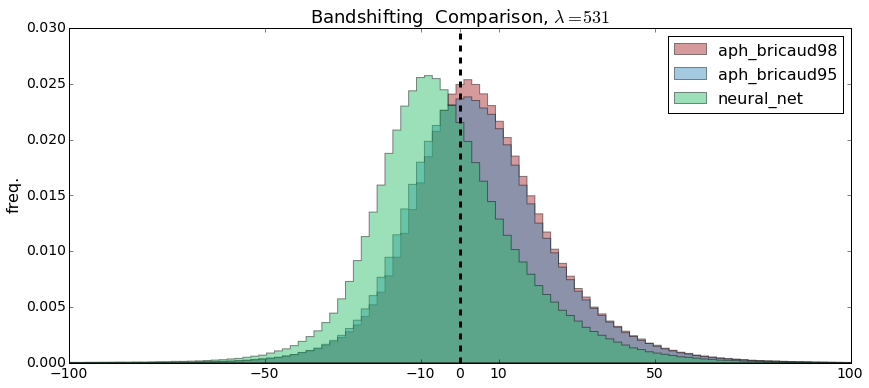

In [83]:
PlotComparisons(dataObjs,colList,plotTitle='Bandshifting  Comparison, $\lambda=531$')